In [1]:
!pip install matplotlib

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SAB.csv to SAB.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv("SAB.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,"242,000","236,300","246,000","236,300",31.25K,0.83%
1,3/4/2019,"242,000","240,000","245,500","239,000",44.09K,0.00%
2,3/5/2019,"243,500","244,500","244,800","240,100",10.22K,0.62%
3,3/6/2019,"243,900","240,400","245,000","240,000",22.91K,0.16%
4,3/7/2019,"241,100","242,000","242,900","240,500",25.34K,-1.15%
...,...,...,...,...,...,...,...
1310,5/29/2024,"60,500","61,000","61,300","60,300",1.47M,-0.82%
1311,5/30/2024,"59,300","59,600","60,000","58,300",1.67M,-1.98%
1312,5/31/2024,"58,300","59,300","59,300","58,300",1.49M,-1.69%
1313,6/3/2024,"59,400","59,000","60,100","58,700",1.13M,1.89%


In [5]:
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df['Date'] = pd.to_datetime(df['Date'])
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,242000.0,"236,300","246,000","236,300",31.25K,0.83%
1,2019-03-04,242000.0,"240,000","245,500","239,000",44.09K,0.00%
2,2019-03-05,243500.0,"244,500","244,800","240,100",10.22K,0.62%
3,2019-03-06,243900.0,"240,400","245,000","240,000",22.91K,0.16%
4,2019-03-07,241100.0,"242,000","242,900","240,500",25.34K,-1.15%
...,...,...,...,...,...,...,...
1310,2024-05-29,60500.0,"61,000","61,300","60,300",1.47M,-0.82%
1311,2024-05-30,59300.0,"59,600","60,000","58,300",1.67M,-1.98%
1312,2024-05-31,58300.0,"59,300","59,300","58,300",1.49M,-1.69%
1313,2024-06-03,59400.0,"59,000","60,100","58,700",1.13M,1.89%


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1315 non-null   datetime64[ns]
 1   Price     1315 non-null   float64       
 2   Open      1315 non-null   object        
 3   High      1315 non-null   object        
 4   Low       1315 non-null   object        
 5   Vol.      1315 non-null   object        
 6   Change %  1315 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 72.0+ KB


<h1>Split the data into training, testing arcording to 7:3

In [7]:
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [8]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [11]:
# Create index for the next 30, 60, and 90 days
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']

# Create feature arrays for the next 30, 60, and 90 days
features_30_days = np.repeat(last_day_close, 30)
features_60_days = np.repeat(last_day_close, 30)
features_90_days = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30, 60, and 90 days
predictions_30_days = model.predict(features_30_days.reshape(-1, 1))
predictions_60_days = model.predict(features_60_days.reshape(-1, 1))
predictions_90_days = model.predict(features_90_days.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_30_days_df = pd.DataFrame(predictions_30_days, index=index_30_days, columns=['Predicted Close'])
predicted_60_days_df = pd.DataFrame(predictions_60_days, index=index_60_days, columns=['Predicted Close'])
predicted_90_days_df = pd.DataFrame(predictions_90_days, index=index_90_days, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_30_days_df)

# Print the predicted closing prices for the next 60 and 90 days
print('Predicted closing prices for the next 60 days:')
print(predicted_60_days_df)

print('Predicted closing prices for the next 90 days:')
print(predicted_90_days_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1315         88057.64
1316         88057.64
1317         88057.64
1318         88057.64
1319         88057.64
1320         88057.64
1321         88057.64
1322         88057.64
1323         88057.64
1324         88057.64
1325         88057.64
1326         88057.64
1327         88057.64
1328         88057.64
1329         88057.64
1330         88057.64
1331         88057.64
1332         88057.64
1333         88057.64
1334         88057.64
1335         88057.64
1336         88057.64
1337         88057.64
1338         88057.64
1339         88057.64
1340         88057.64
1341         88057.64
1342         88057.64
1343         88057.64
1344         88057.64
Predicted closing prices for the next 60 days:
      Predicted Close
1345         88057.64
1346         88057.64
1347         88057.64
1348         88057.64
1349         88057.64
1350         88057.64
1351         88057.64
1352         88057.64
1353         88057.64
1354

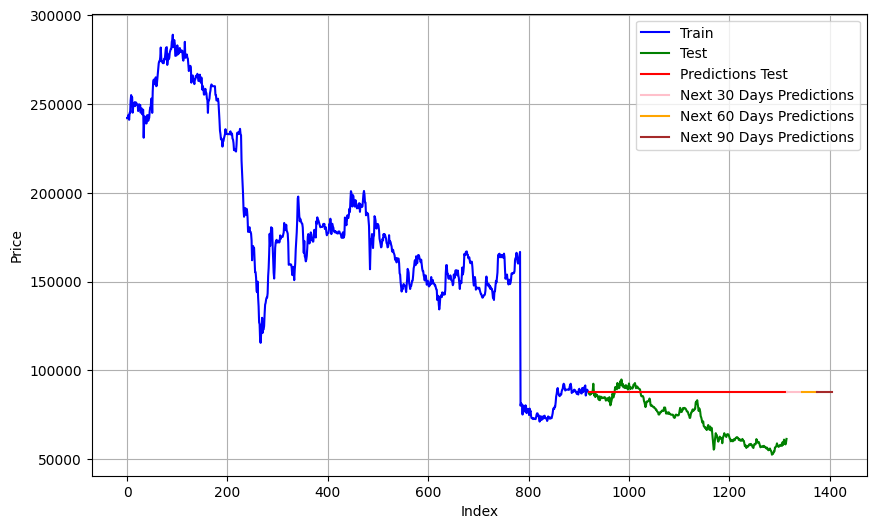

In [12]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(predicted_30_days_df, color='pink', label='Next 30 Days Predictions')
plt.plot(predicted_60_days_df, color='orange', label='Next 60 Days Predictions')
plt.plot(predicted_90_days_df, color='brown', label='Next 90 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 19373.497805536932
Testing MAE: 15805.761215189877
Testing MAPE: 24.97093335910878


<h1># Split the data into training, testing arcording to 8:2

In [14]:
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [15]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [18]:
# Create index for the next 30, 60, and 90 days
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']

# Create feature arrays for the next 30, 60, and 90 days
features_30_days = np.repeat(last_day_close, 30)
features_60_days = np.repeat(last_day_close, 30)
features_90_days = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30, 60, and 90 days
predictions_30_days = model.predict(features_30_days.reshape(-1, 1))
predictions_60_days = model.predict(features_60_days.reshape(-1, 1))
predictions_90_days = model.predict(features_90_days.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_30_days_df = pd.DataFrame(predictions_30_days, index=index_30_days, columns=['Predicted Close'])
predicted_60_days_df = pd.DataFrame(predictions_60_days, index=index_60_days, columns=['Predicted Close'])
predicted_90_days_df = pd.DataFrame(predictions_90_days, index=index_90_days, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_30_days_df)

# Print the predicted closing prices for the next 60 and 90 days
print('Predicted closing prices for the next 60 days:')
print(predicted_60_days_df)

print('Predicted closing prices for the next 90 days:')
print(predicted_90_days_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1315         79020.44
1316         79020.44
1317         79020.44
1318         79020.44
1319         79020.44
1320         79020.44
1321         79020.44
1322         79020.44
1323         79020.44
1324         79020.44
1325         79020.44
1326         79020.44
1327         79020.44
1328         79020.44
1329         79020.44
1330         79020.44
1331         79020.44
1332         79020.44
1333         79020.44
1334         79020.44
1335         79020.44
1336         79020.44
1337         79020.44
1338         79020.44
1339         79020.44
1340         79020.44
1341         79020.44
1342         79020.44
1343         79020.44
1344         79020.44
Predicted closing prices for the next 60 days:
      Predicted Close
1345         79020.44
1346         79020.44
1347         79020.44
1348         79020.44
1349         79020.44
1350         79020.44
1351         79020.44
1352         79020.44
1353         79020.44
1354

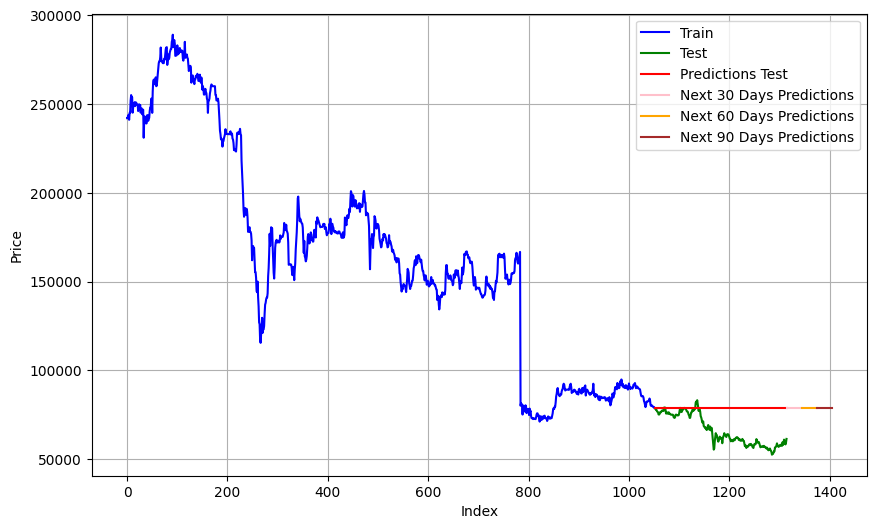

In [19]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(predicted_30_days_df, color='pink', label='Next 30 Days Predictions')
plt.plot(predicted_60_days_df, color='orange', label='Next 60 Days Predictions')
plt.plot(predicted_90_days_df, color='brown', label='Next 90 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 15497.91249530824
Testing MAE: 13018.040152091255
Testing MAPE: 21.637873578299303


<h1>Split the data into training, testing arcording to 9:1

In [21]:
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [22]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [23]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [25]:
# Create index for the next 30, 60, and 90 days
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']

# Create feature arrays for the next 30, 60, and 90 days
features_30_days = np.repeat(last_day_close, 30)
features_60_days = np.repeat(last_day_close, 30)
features_90_days = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30, 60, and 90 days
predictions_30_days = model.predict(features_30_days.reshape(-1, 1))
predictions_60_days = model.predict(features_60_days.reshape(-1, 1))
predictions_90_days = model.predict(features_90_days.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_30_days_df = pd.DataFrame(predictions_30_days, index=index_30_days, columns=['Predicted Close'])
predicted_60_days_df = pd.DataFrame(predictions_60_days, index=index_60_days, columns=['Predicted Close'])
predicted_90_days_df = pd.DataFrame(predictions_90_days, index=index_90_days, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_30_days_df)

# Print the predicted closing prices for the next 60 and 90 days
print('Predicted closing prices for the next 60 days:')
print(predicted_60_days_df)

print('Predicted closing prices for the next 90 days:')
print(predicted_90_days_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1315         62196.93
1316         62196.93
1317         62196.93
1318         62196.93
1319         62196.93
1320         62196.93
1321         62196.93
1322         62196.93
1323         62196.93
1324         62196.93
1325         62196.93
1326         62196.93
1327         62196.93
1328         62196.93
1329         62196.93
1330         62196.93
1331         62196.93
1332         62196.93
1333         62196.93
1334         62196.93
1335         62196.93
1336         62196.93
1337         62196.93
1338         62196.93
1339         62196.93
1340         62196.93
1341         62196.93
1342         62196.93
1343         62196.93
1344         62196.93
Predicted closing prices for the next 60 days:
      Predicted Close
1345         62196.93
1346         62196.93
1347         62196.93
1348         62196.93
1349         62196.93
1350         62196.93
1351         62196.93
1352         62196.93
1353         62196.93
1354

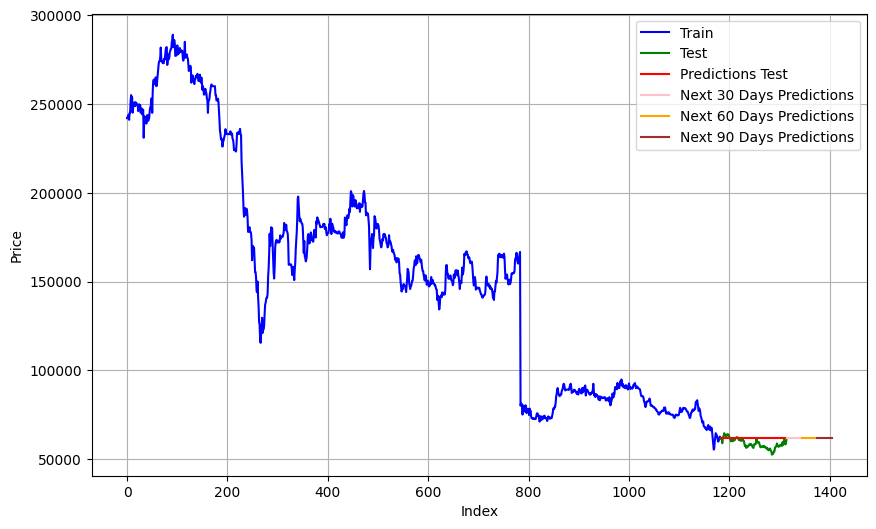

In [26]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(predicted_30_days_df, color='pink', label='Next 30 Days Predictions')
plt.plot(predicted_60_days_df, color='orange', label='Next 60 Days Predictions')
plt.plot(predicted_90_days_df, color='brown', label='Next 90 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 4227.393879899187
Testing MAE: 3555.76303030303
Testing MAPE: 6.2177734371729745
